### Nivell 1

L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".

- Exercici 1

Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources". 

- Exercici 2

Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web. 

In [1]:
import csv
import re
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import stats


sep = r'^(\S+)\s(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})\s-\s-\s\[(.+)\]\s\"(\S+)\s(\S+)\s(\S+)\"\s(\S+).+\s\"(\S+)\s\((.+)\).+$'
header = ['web','client_IP','timestamp','event','consulta','protocol','http_status_code','explorer', 'user_agent','rest']

df = pd.read_csv(r'C:\Users\motxi\Documents\Data_Science_IT_Academy\Sprints\S04\Web_access_log-akumenius.com.txt',
                 engine = 'python',
                 delimiter = sep,
                 names = header,
                 encoding = 'ISO-8859-1')

pd.to_datetime(df['timestamp'], format='%dd/%MMM/%yyyy:%HH:%mm:%SS', utc=True, errors='ignore' )

log_df = df.filter(['web','client_IP','timestamp','event','consulta','protocol','http_status_code','explorer','user_agent','rest'], axis=1)

log_df.head()

,web,client_IP,timestamp,event,consulta,protocol,http_status_code,explorer,user_agent,rest
NaN,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200.0,Apache,internal dummy connection,NaN
NaN,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200.0,Apache,internal dummy connection,NaN
NaN,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200.0,Apache,internal dummy connection,NaN
NaN,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200.0,Apache,internal dummy connection,NaN
NaN,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS,*,HTTP/1.0,200.0,Apache,internal dummy connection,NaN


In [2]:
print(log_df.mode(dropna=True), '\n')

                 web      client_IP                   timestamp event  \
0  www.akumenius.com  66.249.76.216  28/Feb/2014:04:16:25 +0100   GET   

  consulta  protocol  http_status_code     explorer  \
0        *  HTTP/1.1             200.0  Mozilla/5.0   

                                          user_agent  rest  
0  compatible; Googlebot/2.1; +http://www.google....   NaN   



compatible; Googlebot/2.1; +http://www.google.com/bot.html               19.658295
X11; U; Linux i686; ca; rv:1.9.2.17                                       5.364196
internal dummy connection                                                 5.363810
Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko              4.858395
Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko                     3.326319
Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko                     2.838665
Windows NT 6.1; WOW64; Trident/7.0; rv:11.0                               2.734416
compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html     2.525917
compatible; AhrefsBot/5.0; +http://ahrefs.com/robot/                      2.379969
Windows NT 6.1; WOW64; rv:27.0                                            2.373019
Name: user_agent, dtype: float64


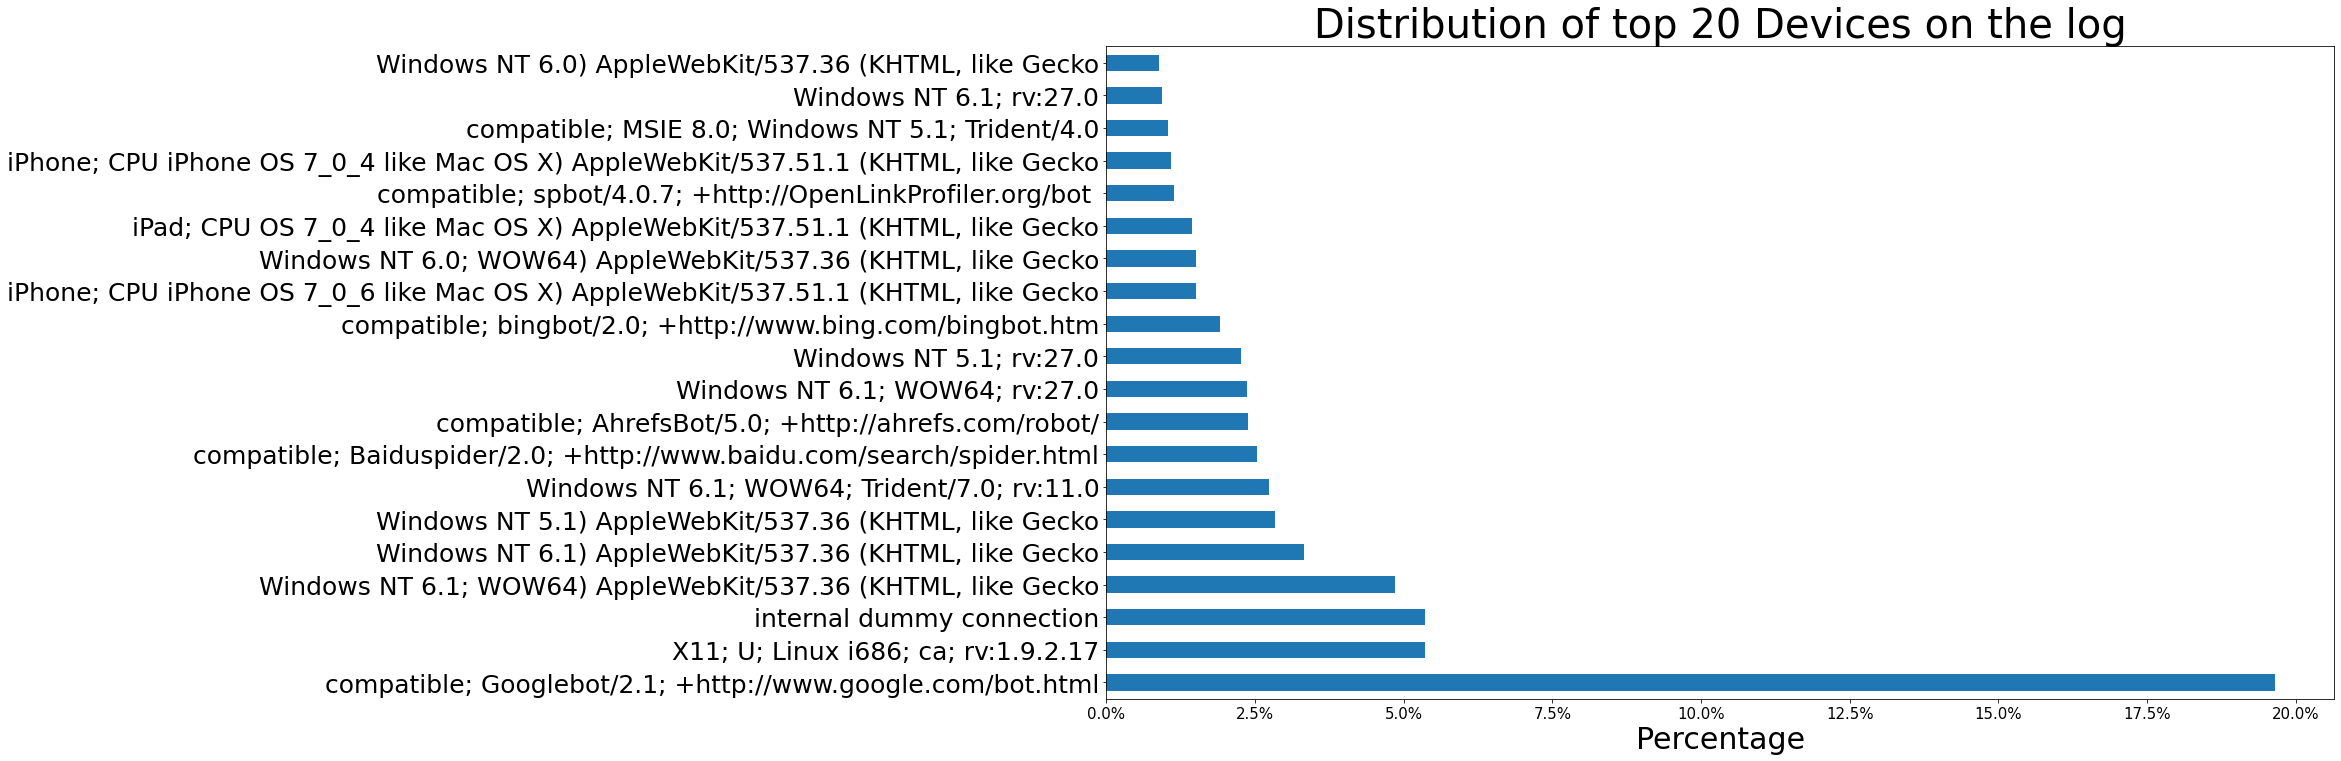

array(['OPTIONS', 'GET', None, 'POST', 'HEAD'], dtype=object)

In [3]:
fig,ax = plt.subplots(figsize = (22,12))
print(log_df['user_agent'].value_counts(normalize=True).mul(100)[:10])

ax = log_df['user_agent'].value_counts(normalize=True).mul(100)[:20].plot(kind='barh')
ax.tick_params(axis='y', labelsize=25)
ax.tick_params(axis='x', labelsize=15)
ax.set_xlabel("Percentage", size = 30)
ax.set_title("Distribution of top 20 Devices on the log", size = 40)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('./Devices_travel_ekumenus.png')
plt.show(fig)   

log_df['event'].unique()

In [4]:
print(log_df['timestamp'].value_counts()[:200])


28/Feb/2014:04:16:25 +0100    83
25/Feb/2014:18:01:20 +0100    76
25/Feb/2014:18:36:30 +0100    68
25/Feb/2014:15:58:34 +0100    67
26/Feb/2014:17:36:25 +0100    67
                              ..
24/Feb/2014:14:22:49 +0100    37
27/Feb/2014:16:22:06 +0100    37
25/Feb/2014:17:52:35 +0100    37
23/Feb/2014:20:07:17 +0100    37
27/Feb/2014:13:06:39 +0100    37
Name: timestamp, Length: 200, dtype: int64


- Exercici 3

Geolocalitza les IP's.

In [5]:
import socket
from requests import get
import sys
!{sys.executable} -m pip install ip2geotools  
from ip2geotools.databases.noncommercial import DbIpCity as locDb # 


In [12]:
def createModel(db, ip): # create a response model holding attributes and methods of location
    model = db.get(ip, api_key='Free')
    return model

In [13]:
def extractModel(model, x): # to extract city|region|country|location pass it as X
    if x == 'city':
        return model.city
    elif x == 'region':
        return model.region
    elif x == 'country':
        return model.country
    else :
        return (model.latitude, model.longitude)
    
   

In [14]:
log_df['country'] = createModel(log_df,lambda x: log_df['client_IP'])

TypeError: get() got an unexpected keyword argument 'api_key'